In [74]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cluster_validation as cv

importlib.reload(cv)

from sklearn.cluster import KMeans

Here we will test the cluster validation functions on a simple dataset with 3 clusters. See slide 7 of https://piazza.com/class_profile/get_resource/ircffd3731a4n0/iu5o8ptzxdz5ev for a visual representation of the dataset.

In [75]:
n_points_per_cluster = 40
np.random.seed(42)

# generate coordinates for the 3 clusters
x1 = np.random.uniform(0.24, 0.4, n_points_per_cluster)
y1 = np.random.uniform(0.24, 0.4, n_points_per_cluster)
x2 = np.random.uniform(0.64, 0.8, n_points_per_cluster)
y2 = np.random.uniform(0.24, 0.4, n_points_per_cluster)
x3 = np.random.uniform(0.44, 0.6, n_points_per_cluster)
y3 = np.random.uniform(0.64, 0.8, n_points_per_cluster)

# concatenate coordinates for all clusters
x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

# clustered data dataframe
df = pd.DataFrame({'x': x, 'y': y})

# generate random coordinates
x = np.random.rand(n_points_per_cluster * 3)
y = np.random.rand(n_points_per_cluster * 3)

# random data dataframe
df_random = pd.DataFrame({'x': x, 'y': y})

# perform K-Means clustering on the (clustered) data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df)

# perform K-Means clustering on the random data
kmeans_random = KMeans(n_clusters=3, random_state=42)
clusters_random = kmeans_random.fit_predict(df_random)

Below, we plot the original (clustered) data and the random data. Note that we haven't yet assigned the data to any clusters. We will do that in the next cell.

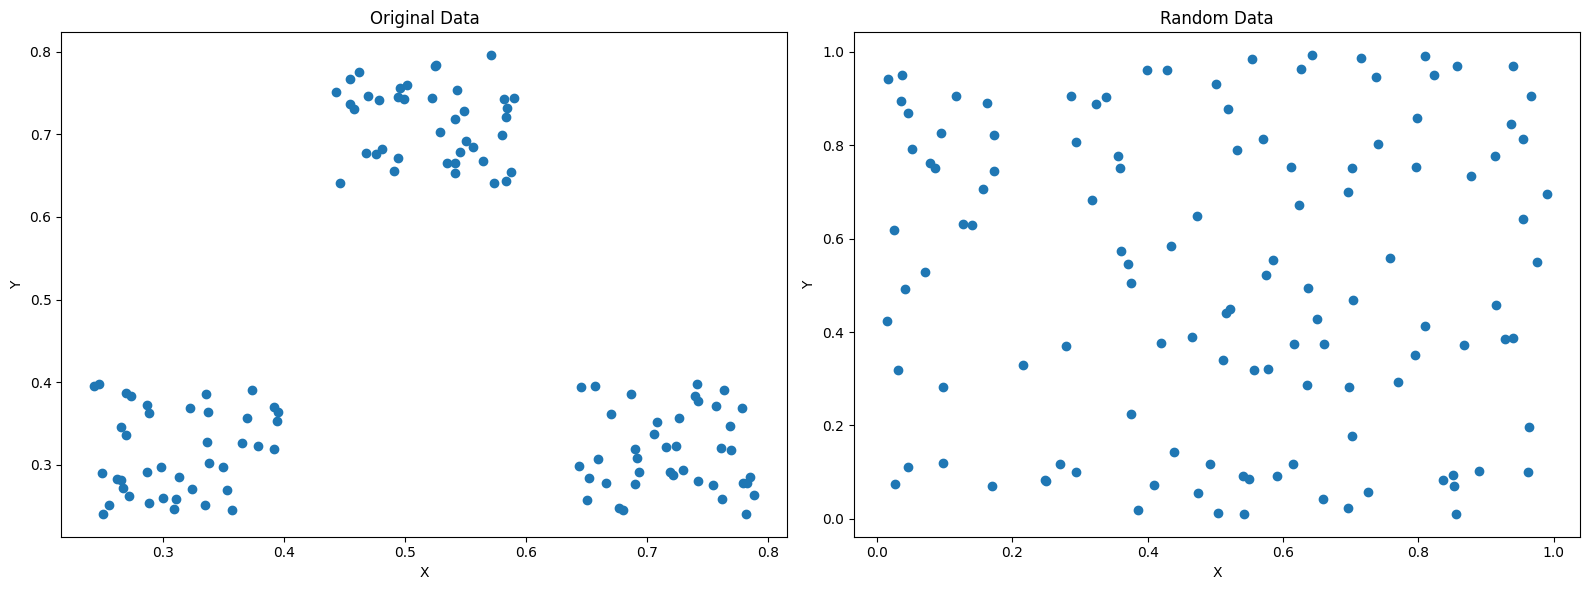

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df['x'], df['y'])
axes[0].set_title('Original Data')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].scatter(df_random['x'], df_random['y'])
axes[1].set_title('Random Data')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

Now we will assign the data to clusters and plot the results.

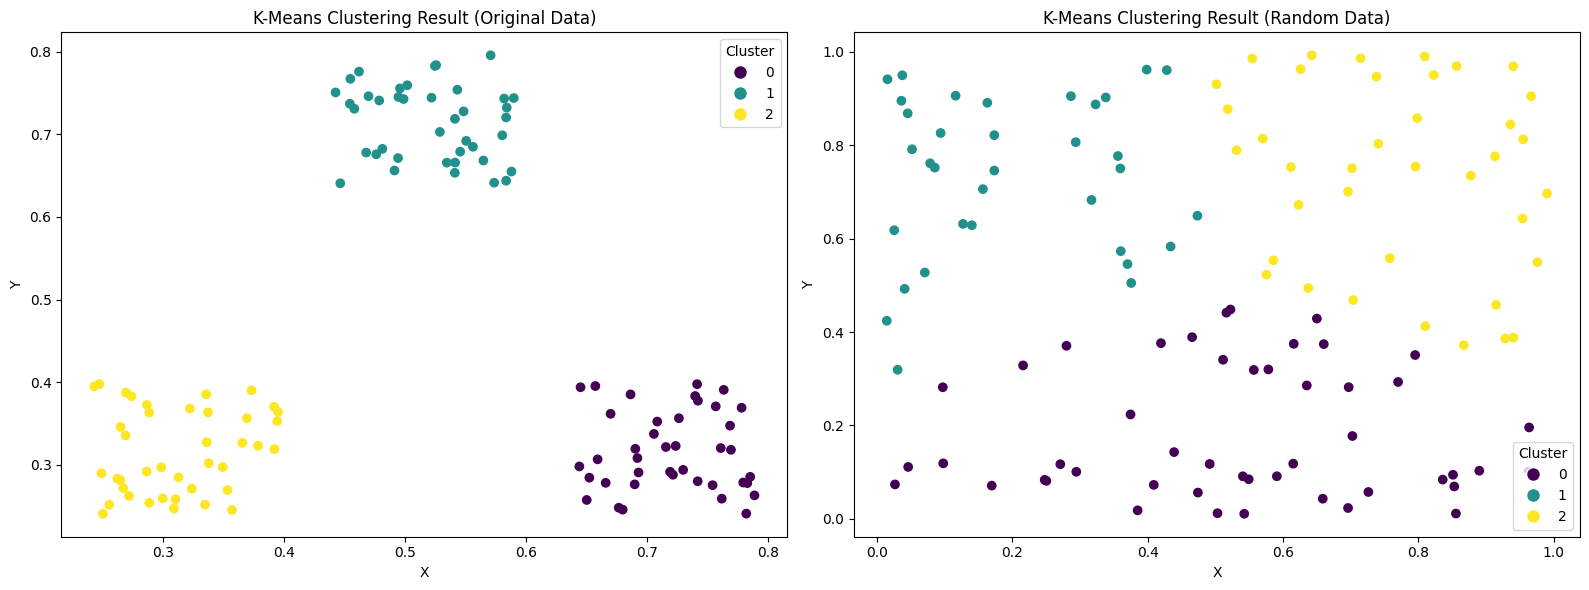

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# clustering results for original data
scatter = axes[0].scatter(df['x'], df['y'], c=clusters, cmap='viridis')
axes[0].set_title('K-Means Clustering Result (Original Data)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# create a legend for the clusters
legend_labels = np.unique(clusters)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels]
axes[0].legend(handles, legend_labels, title='Cluster')

# clustering results for random data
scatter_random = axes[1].scatter(df_random['x'], df_random['y'], c=clusters_random, cmap='viridis')
axes[1].set_title('K-Means Clustering Result (Random Data)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# create a legend for the clusters in the random data
legend_labels_random = np.unique(clusters_random)
handles_random = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_random.cmap(scatter_random.norm(label)), markersize=10) for label in legend_labels_random]
axes[1].legend(handles_random, legend_labels_random, title='Cluster')

plt.tight_layout()
plt.show()

Now we will calculate the cluster validity correlation for the original and random data. The cluster validity correlation is a measure of how well the clustering results align with the actual clusters. A higher correlation indicates a better clustering result. For the original data, we expect a higher (negative) correlation than for the random data.

In [78]:
correlation_original = cv.cv_correlation(df, clusters)
correlation_random = cv.cv_correlation(df_random, clusters_random)

print(f'Cluster Validity Correlation (original data): {correlation_original:.3f}')
print(f'Cluster Validity Correlation (random data): {correlation_random:.3f}')

Cluster Validity Correlation (original data): -0.939
Cluster Validity Correlation (random data): -0.617


Next, we will calculate and plot the similarity matrix for the original and random data. The similarity matrix shows the pairwise similarity between data points. For the original data, we expect to see higher similarity within clusters and lower similarity between clusters. For the random data, we expect to see less clear squares.

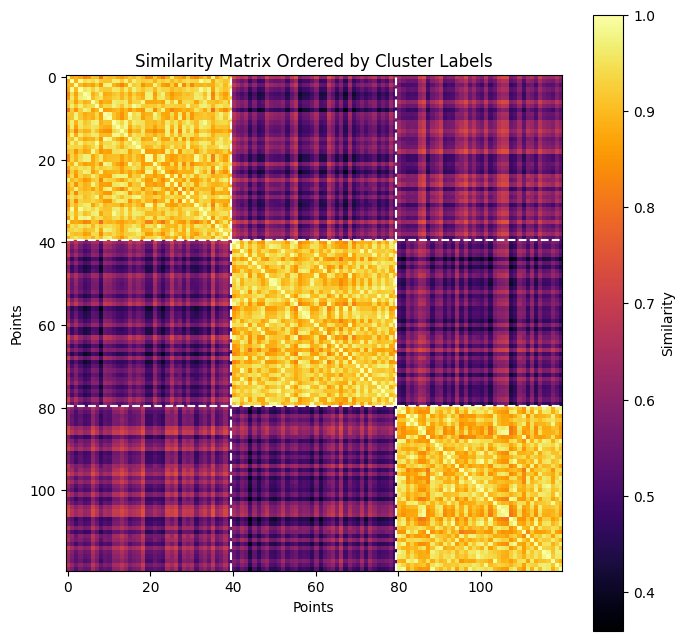

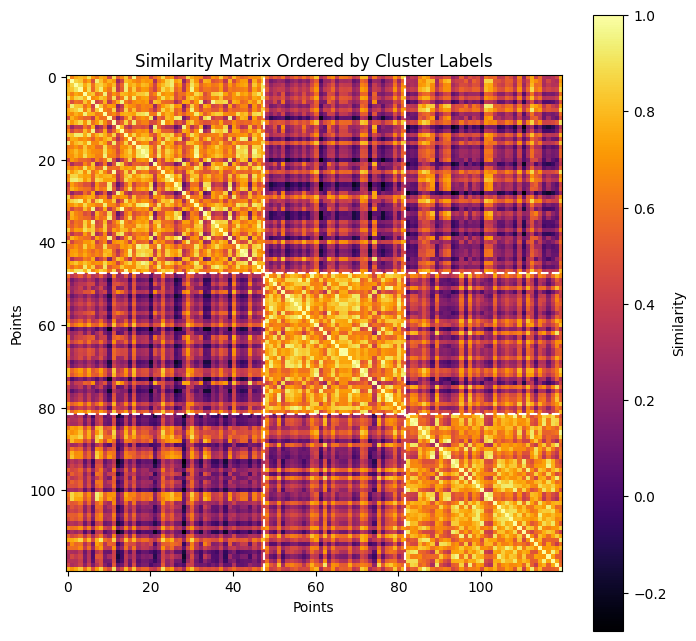

In [79]:
cv.cv_similarity_matrix(df.values, clusters)
cv.cv_similarity_matrix(df_random.values, clusters_random)

Finally, we will calculate the cluster validity statistics for the original and random data. We should see that all scores are better and more atypical for the original data than for the random data.

In [80]:
# Perform cluster validity statistics
n_clusters = 3
stats = cv.cv_statistics(kmeans, clusters, df, n_clusters, 'euclidean')

---
Actual SSE: 0.5196
Random SSE: Mean: 2.1986, Std: 0.3518
SSE Z-Score: -4.7725 => SSE is Atypical: True
---
Actual Silhouette Score: 0.7912
Random Silhouette: Mean: 0.5217, Std: 0.0224
Silhouette Z-Score: 12.0351 => Silhouette Score is Atypical: True
---
Actual Correlation: -0.9395
Random Correlation: Mean: -0.7181, Std: 0.0210
Correlation Z-Score: -10.5380 => Correlation is Atypical: True
---


In [81]:
# Perform cluster validity statistics on random data
n_clusters = 3
stats_random = cv.cv_statistics(kmeans_random, clusters_random, df_random, n_clusters, 'euclidean')

---
Actual SSE: 7.7077
Random SSE: Mean: 8.1686, Std: 0.5131
SSE Z-Score: -0.8984 => SSE is Atypical: False
---
Actual Silhouette Score: 0.4154
Random Silhouette: Mean: 0.4009, Std: 0.0254
Silhouette Z-Score: 0.5710 => Silhouette Score is Atypical: False
---
Actual Correlation: -0.6173
Random Correlation: Mean: -0.6011, Std: 0.0291
Correlation Z-Score: -0.5580 => Correlation is Atypical: False
---
